In [55]:
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 

from dbr import *

import matplotlib.pyplot as plt

error = BarcodeReader.init_license(os.getenv("DYNAMSOFT_API_KEY"))
if error[0] != EnumErrorCode.DBR_OK:
   # Add your code for license error processing
   print("License error: "+ error[1])

In [56]:
# prepare test image array

normal_lighting_images = ["/Users/kazuya/Projects/warehouse_drone/barcode_scanner/test_images/high_res_images/normal_lighting/DJI_00"+str(i)+".png" for i in range(24,52)]
dark_lighting_images = ["/Users/kazuya/Projects/warehouse_drone/barcode_scanner/test_images/high_res_images/dark_lighting/DJI_00"+str(i)+".png" for i in range(52,67)]
vertical_images = ["/Users/kazuya/Projects/warehouse_drone/barcode_scanner/test_images/high_res_images/vertical/DJI_00"+str(i)+".png" for i in range(67,92)]


In [57]:
# prepare truth barcode
barcode = {9716838392: 1,
           6319639147: 2,
           2965080467: 3,
           9414082678: 4,
           4538047476: 5,
           6326969723: 6,
           4399547721: 7,
           8003218570: 8,
           6555798852: 9,
           7254610708: 10
           }

In [58]:
ITF_result_normal_lighting = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
QR_result_normal_lighting = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}
ITF_result_dark_lighting = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
QR_result_dark_lighting = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}
ITF_result_vertical = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[], 10:[]}
QR_result_vertical = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[]}

In [59]:
reader = BarcodeReader.get_instance()
if reader != None:
    settings = reader.get_runtime_settings()
    settings.barcode_format_ids = EnumBarcodeFormat.BF_ALL
    settings.barcode_format_ids_2 = EnumBarcodeFormat_2.BF2_POSTALCODE | EnumBarcodeFormat_2.BF2_DOTCODE
    settings.excepted_barcodes_count = 10
    reader.update_runtime_settings(settings)
    try:
        for image_path in normal_lighting_images:
            results = reader.decode_file(image_path)
            if results != None:
                for text_result in results:

                    if text_result.barcode_format_string == "ITF":
                        if int(text_result.barcode_text) in barcode:
                            ITF_result_normal_lighting[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition

                    elif text_result.barcode_format_string == "QR_CODE":
                        if int(text_result.barcode_text) in barcode:
                            QR_result_normal_lighting[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition                


    except BarcodeReaderError as bre:
        print(bre) 

    # Recycle the instance
    reader.recycle_instance()



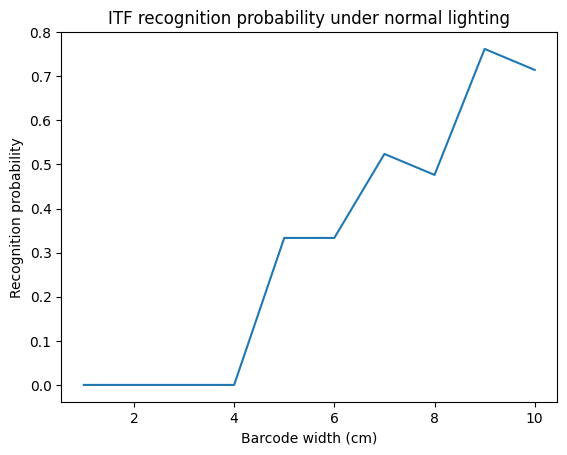

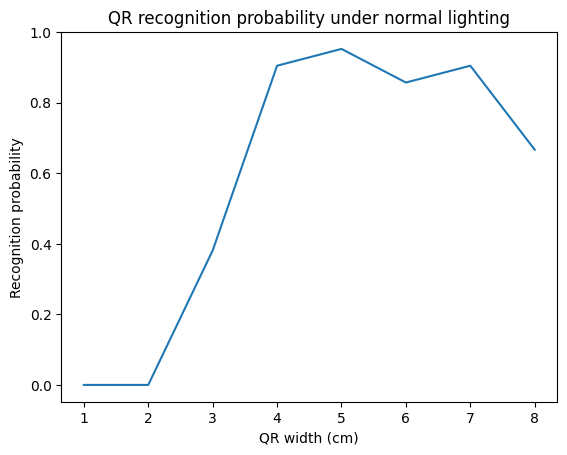

In [66]:
total_images_normal_lighting = len(normal_lighting_images) - 7

ITF_recognition_prob_normal_lighting = []
QR_recognition_prob_normal_lighting = []
for i in range(1,11):
    ITF_recognition_prob_normal_lighting.append(len(ITF_result_normal_lighting[i])/total_images_normal_lighting)
for i in range(1,9):
    QR_recognition_prob_normal_lighting.append(len(QR_result_normal_lighting[i])/total_images_normal_lighting)

plt.plot([1,2,3,4,5,6,7,8,9,10], ITF_recognition_prob_normal_lighting)
plt.title("ITF recognition probability under normal lighting")
plt.xlabel("Barcode width (cm)")
plt.ylabel("Recognition probability")
plt.show()
plt.plot([1,2,3,4,5,6,7,8], QR_recognition_prob_normal_lighting)
plt.title("QR recognition probability under normal lighting")
plt.xlabel("QR width (cm)")
plt.ylabel("Recognition probability")
plt.show()


In [61]:
reader = BarcodeReader.get_instance()
if reader != None:
    settings = reader.get_runtime_settings()
    settings.barcode_format_ids = EnumBarcodeFormat.BF_ALL
    settings.barcode_format_ids_2 = EnumBarcodeFormat_2.BF2_POSTALCODE | EnumBarcodeFormat_2.BF2_DOTCODE
    settings.excepted_barcodes_count = 10
    reader.update_runtime_settings(settings)
    try:
        for image_path in dark_lighting_images:
            results = reader.decode_file(image_path)
            if results != None:
                for text_result in results:

                    if text_result.barcode_format_string == "ITF":
                        if int(text_result.barcode_text) in barcode:
                            ITF_result_dark_lighting[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition

                    elif text_result.barcode_format_string == "QR_CODE":
                        if int(text_result.barcode_text) in barcode:
                            QR_result_dark_lighting[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition                


    except BarcodeReaderError as bre:
        print(bre) 

    # Recycle the instance
    reader.recycle_instance()

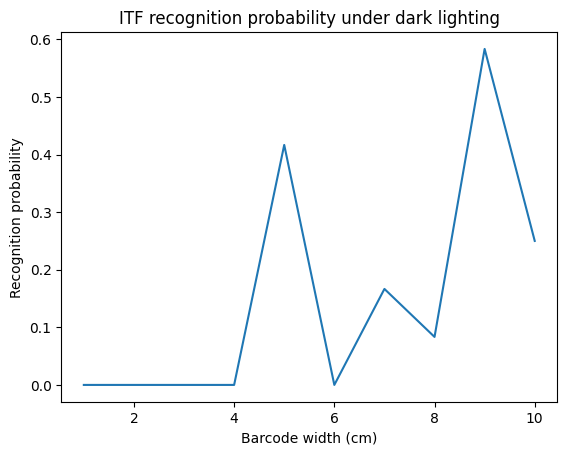

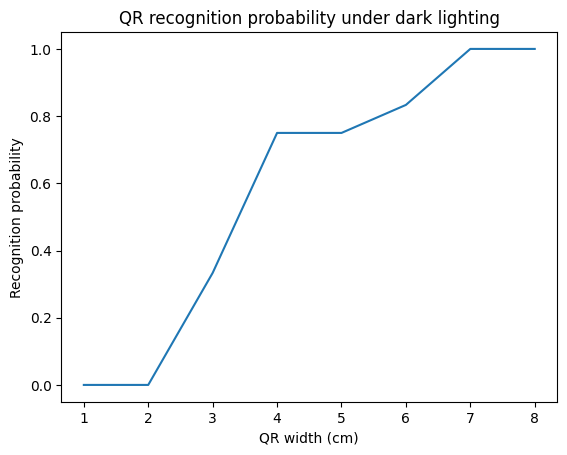

In [67]:
total_images_dark_lighting = len(dark_lighting_images) - 3

ITF_recognition_prob_dark_lighting = []
QR_recognition_prob_dark_lighting = []
for i in range(1,11):
    ITF_recognition_prob_dark_lighting.append(len(ITF_result_dark_lighting[i])/total_images_dark_lighting)
for i in range(1,9):
    QR_recognition_prob_dark_lighting.append(len(QR_result_dark_lighting[i])/total_images_dark_lighting)

plt.plot([1,2,3,4,5,6,7,8,9,10], ITF_recognition_prob_dark_lighting)
plt.title("ITF recognition probability under dark lighting")
plt.xlabel("Barcode width (cm)")
plt.ylabel("Recognition probability")
plt.show()
plt.plot([1,2,3,4,5,6,7,8], QR_recognition_prob_dark_lighting)
plt.title("QR recognition probability under dark lighting")
plt.xlabel("QR width (cm)")
plt.ylabel("Recognition probability")
plt.show()

In [63]:
reader = BarcodeReader.get_instance()
if reader != None:
    settings = reader.get_runtime_settings()
    settings.barcode_format_ids = EnumBarcodeFormat.BF_ALL
    settings.barcode_format_ids_2 = EnumBarcodeFormat_2.BF2_POSTALCODE | EnumBarcodeFormat_2.BF2_DOTCODE
    settings.excepted_barcodes_count = 10
    reader.update_runtime_settings(settings)
    try:
        for image_path in vertical_images:
            results = reader.decode_file(image_path)
            if results != None:
                for text_result in results:

                    if text_result.barcode_format_string == "ITF":
                        if int(text_result.barcode_text) in barcode:
                            ITF_result_vertical[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition

                    elif text_result.barcode_format_string == "QR_CODE":
                        if int(text_result.barcode_text) in barcode:
                            QR_result_vertical[barcode[int(text_result.barcode_text)]].append(text_result.extended_results[0].confidence)
                        # else:
                            # false recognition                


    except BarcodeReaderError as bre:
        print(bre) 

    # Recycle the instance
    reader.recycle_instance()

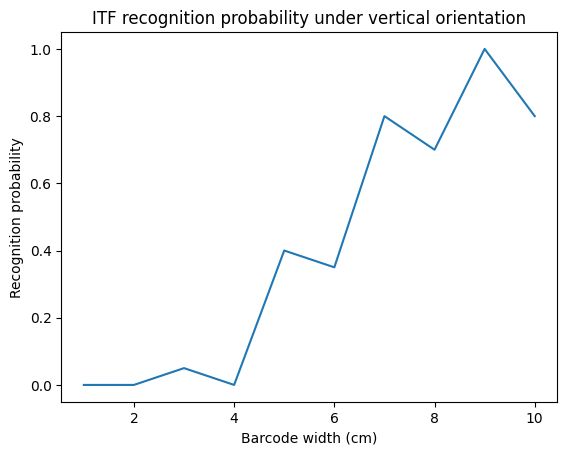

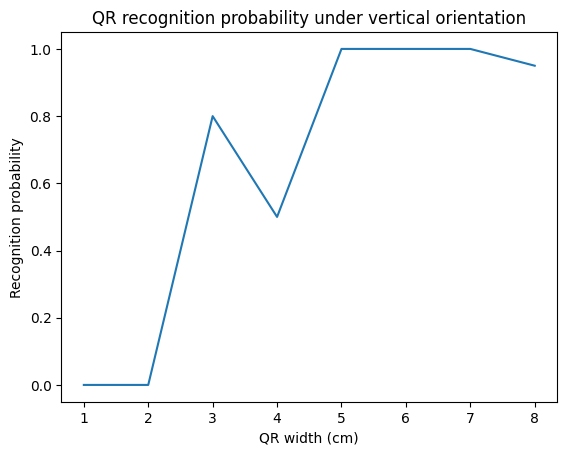

In [68]:
total_images_vertical = len(vertical_images) - 5

ITF_recognition_prob_vertical = []
QR_recognition_prob_vertical = []
for i in range(1,11):
    ITF_recognition_prob_vertical.append(len(ITF_result_vertical[i])/total_images_vertical)
for i in range(1,9):
    QR_recognition_prob_vertical.append(len(QR_result_vertical[i])/total_images_vertical)

plt.plot([1,2,3,4,5,6,7,8,9,10], ITF_recognition_prob_vertical)
plt.title("ITF recognition probability under vertical orientation")
plt.xlabel("Barcode width (cm)")
plt.ylabel("Recognition probability")
plt.show()
plt.plot([1,2,3,4,5,6,7,8], QR_recognition_prob_vertical)
plt.title("QR recognition probability under vertical orientation")
plt.xlabel("QR width (cm)")
plt.ylabel("Recognition probability")
plt.show()